In [1]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)): 
  ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def batch_selector(x,y,loss,batch_size,mode="random"):
    if(mode=="random"):
        indices=np.random.choice(len(x),batch_size)
        return(x[indices],y[indices],indices)
    if(mode=="selective"):
        pp=loss.copy()
        k=sum(pp<0)
        if(k!=0):
            h=k/len(pp)
            pp=pp/(sum(pp[pp<0]))*h
        pp[pp<0]=1/len(pp)

        indices=np.random.choice(len(pp),batch_size,pp.tolist())
        return(x[indices],y[indices],indices)
    

In [5]:
import tensorflow as tf

In [6]:
x = tf.placeholder(tf.float32, [None, 784])

In [7]:
W = tf.Variable(tf.random_normal([784, 64]))
b = tf.Variable(tf.ones([64]))
y1 = tf.nn.sigmoid(tf.matmul(x, W) + b)
W1 = tf.Variable(tf.random_normal([64, 10]))
b1 = tf.Variable(tf.ones([10]))
y = tf.nn.softmax(tf.matmul(y1, W1) + b1)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy1 = (-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy=tf.reduce_mean(cross_entropy1)
train_step = tf.train.GradientDescentOptimizer(1.0).minimize(cross_entropy)

In [8]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
#Selection of harder examples(high loss) with higher probability in batches 

In [10]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;p=np.array([-10.0]*len(mnist.train.labels));accumulator1=[]

This plot shows how the loss decreases with each iteration (actually 10 iterations)


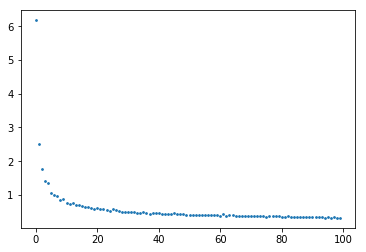

Time spent in training :  159.41603779792786  seconds
Current accuracy :  0.8964


In [11]:
t=time.time()
for _ in range(1000):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,p,batch_size,'selective')
    loss=sess.run([cross_entropy1, train_step], feed_dict={x: batch_xs, y_: batch_ys})[0]
    p[indices]=loss#############################################################################################
    if _%10==0:
        aa,bb=sess.run([cross_entropy1,cross_entropy], feed_dict={x: mnist.train.images, y_: mnist.train.labels})
        p=aa
        accumulator1=accumulator1+[bb]
print("This plot shows how the loss decreases with each iteration (actually 10 iterations)")
plt.scatter(np.arange(len(accumulator1)),accumulator1,s=3)
plt.show()
print("Time spent in training : ",time.time()-t," seconds")
print("Current accuracy : ",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [12]:
#Selection of all examples with same probability in batches 

In [13]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;p=np.array([-10.0]*len(mnist.train.labels));accumulator2=[]

This plot shows how the loss decreases with each iteration (actually 10 iterations)


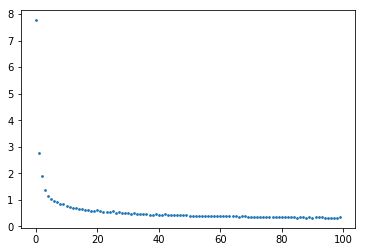

Time spent in training :  14.46164608001709  seconds
Current accuracy :  0.9029


In [14]:
t=time.time()
for _ in range(1000):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,p,batch_size,'random')
    loss=sess.run([cross_entropy1, train_step], feed_dict={x: batch_xs, y_: batch_ys})[0]
    if _%10==0:
        accumulator2=accumulator2+[sess.run(cross_entropy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})]
print("This plot shows how the loss decreases with each iteration (actually 10 iterations)")
plt.scatter(np.arange(len(accumulator2)),accumulator2,s=3.0)
plt.show()
print("Time spent in training : ",time.time()-t," seconds")
print("Current accuracy : ",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

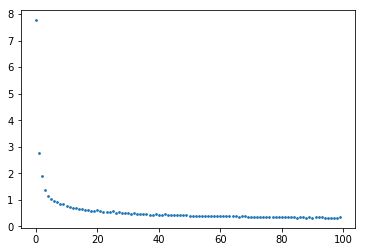

In [15]:
plt.scatter(np.arange(len(accumulator2)),accumulator2,s=3)
plt.show()